In [2]:
import numpy as np
import pandas as pd
import time
from collections import Counter
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
Path.cwd()
path_folder = Path.cwd().parent.parent / "DATA/"

In [4]:
# Fichier correct
filename    = 'ESP_PUBLIC.IDENTITE_ARBRE.csv'
csv_file    = path_folder/filename

In [5]:
data = pd.read_csv(csv_file, sep =',', header=0, index_col=False, names=None)

# Iteration 1

In [6]:
# lire les 2 premieres lignes
data.head(2)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,16750,ESP19318,ESP19318,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7394161255246..."
1,20142,ESP18095,ESP18095,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7397428849165..."


In [7]:
# extraire la colonne annee et la stocker dans une liste
data['ANNEEDEPLANTATION']

0        1975.0
1        1975.0
2        2001.0
3        1975.0
4        2006.0
          ...  
31887    2005.0
31888    1980.0
31889    1980.0
31890    1980.0
31891    2005.0
Name: ANNEEDEPLANTATION, Length: 31892, dtype: float64

In [8]:
# afficher les 50 premieres lignes et les 50 dernieres
data.head(50)
data.tail(50)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
31842,4399,ESP11392,ESP11392,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7230677414272..."
31843,4395,ESP11391,ESP11391,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7227656150215..."
31844,4392,ESP11390,ESP11390,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7227165764217..."
31845,628,ESP10102,ESP10102,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7229100084931..."
31846,624,ESP10101,ESP10101,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7231933478111..."
31847,623,ESP10100,ESP10100,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7229692012530..."
31848,26707,ESP8845,ESP8845,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7232405085905..."
31849,26702,ESP8844,ESP8844,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7226054473579..."
31850,23006,ESP6837,ESP6837,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7226075563234..."
31851,15671,ESP6029,ESP6029,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7229105799314..."


In [9]:
# nombre d'entrees manquantes pour les annees
data['ANNEEDEPLANTATION'].isna().sum()

763

In [10]:
# nombre d'arbres recensés
ncol    = data.shape[1]
narbres = data.shape[0]
data['ANNEEDEPLANTATION'].notna().sum()

31129

In [11]:
# moyenne arbres plantés par année
moyenne_arbre = data['ANNEEDEPLANTATION'].notna().sum() / (data['ANNEEDEPLANTATION'].max() - data['ANNEEDEPLANTATION'].min() + 1)
print('Moyenne arbres plantes :', moyenne_arbre)

Moyenne arbres plantes : 324.2604166666667


In [99]:
# afficher tous les arbres depuis mon anneé de naissance
annee_naissance = 1987
mask1 = data['ANNEEDEPLANTATION'] == 1987
#data[mask1]
print("Nombre d'arbres plantes en ",annee_naissance,":", data[mask1].shape[0])

mask2 = data['ANNEEDEPLANTATION'] > 1987
#type(data[mask2]['ANNEEDEPLANTATION'])
print("Nombre d'arbres plantes depuis",annee_naissance,":",data[mask2].shape[0])

Nombre d'arbres plantes en  1987 : 755
Nombre d'arbres plantes depuis 1987 : 14504


In [121]:
# Quel maire a plante le plus d'arbres?
dict_maire = {1932: "Paul Mistral",
             1935 : "Léon Martin",
             1944 : "Paul Cocat",
             1945 : "Frederic Lafleur",
             1947 : "Léon Martin",
             1948 : "Marius Bally",
             1949 : "Raymond Perinetti",
             1959 : "Léon Martin",
             1965 : "Albert Michallon",
             1983 : "Hubert Dubedout",
             1995 : "Alain Carignon",
             2014 : "Michel Destot",
             2020 : "Eric Piolle"}

annee_maire = {}
begA = int(data.ANNEEDEPLANTATION.min())
for annee,maire in dict_maire.items():
    for i in range(begA,int(data.ANNEEDEPLANTATION.max()+1)):
        if i <= annee:
#            print(dict_maire[annee])
            annee_maire[i] = dict_maire[annee]
        else:
            begA = int(annee)+1

#annee_maire
data['MAIRE'] = data['ANNEEDEPLANTATION'].map(annee_maire)
data['MAIRE'].value_counts()

Hubert Dubedout     12028
Michel Destot        9033
Alain Carignon       5059
Eric Piolle          2969
Albert Michallon     1458
Léon Martin           543
Paul Cocat             27
Paul Mistral           12
Name: MAIRE, dtype: int64

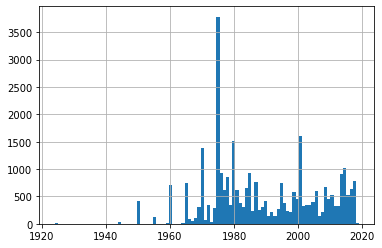

In [14]:
# Histogramme arbres plantés
nbins = int(data['ANNEEDEPLANTATION'].max() - data['ANNEEDEPLANTATION'].min() + 1)
data['ANNEEDEPLANTATION'].hist(bins=nbins)

In [15]:
# Recuperer le genre botanique et l'annee de plantation
data.loc[:, ['GENRE_BOTA','ANNEEDEPLANTATION']]

,GENRE_BOTA,ANNEEDEPLANTATION
0,Acer,1975.0
1,Acer,1975.0
2,Fraxinus,2001.0
3,Carpinus,1975.0
4,Alnus,2006.0
...,...,...
31887,Acer,2005.0
31888,Picea,1980.0
31889,Picea,1980.0
31890,Betula,1980.0


In [16]:
data['GENRE_BOTA'].isna().sum()

438

In [17]:
data.loc[:, ['GENRE_BOTA','ANNEEDEPLANTATION']].sort_values(['ANNEEDEPLANTATION'],ascending=False)

,GENRE_BOTA,ANNEEDEPLANTATION
19349,Koelreuteria,2019.0
5439,Prunus,2019.0
16114,Magnolia,2019.0
5438,Prunus,2019.0
5440,Euodia,2019.0
...,...,...
31638,NaN,NaN
31767,Fraxinus,NaN
31768,Fagus,NaN
31769,Fagus,NaN


In [155]:
# Fichier correct
filename     = 'ESP_PUBLIC.IDENTITE_ARBRE.csv'
csv_file     = path_folder/filename
data_correct = pd.read_csv(csv_file, dtype=np.dtype('O'), low_memory=False)

# Fichier corrompu
filename    = 'ESP_PUBLIC.IDENTITE_ARBRE_CORRPUTED.csv'
csv_file    = path_folder/filename
data_corrompu = pd.read_csv(csv_file, dtype=np.dtype('O'), low_memory=False)

In [151]:
data_corrompu.equals(data_correct)

False

In [159]:
pd.concat([data_correct,data_corrompu]).drop_duplicates(keep=False)

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
158,31975,ESP32701,ESP32701,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7404981502196..."
220,31913,ESP32639,ESP32639,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407896214219..."
17124,3504,ESP2897,ESP2897,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7255672764694..."
24808,510,ESP14156,ESP14156,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7167636965311..."
29552,13591,ESP21177,ESP21177,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7392320939366..."
29559,17226,ESP25351,ESP25351,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7212258196560..."
158,31975,ESP32701,ESP32701,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7404981502196..."
220,31913,ESP32639,ESP32639,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7407896214219..."
17124,3504,ESP2897,ESP2897,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7255672764694..."
24808,510,ESP14156,ESP14156,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7167636965311..."


In [166]:
# Write csv
data_correct_copy = data_correct.copy()
data_correct_copy.to_csv(path_folder/'ESP_PUBLIC.IDENTITE_ARBRE_pandas_corr.csv')
data_correct.to_csv(path_folder/'ESP_PUBLIC.IDENTITE_ARBRE_pandas.csv')

# Iteration 2

In [18]:
# Identifier les genres botaniques - combien y en a t il?
data['GENRE_BOTA'].value_counts().shape[0]

119

In [19]:
data['GENRE_BOTA'].value_counts()

Acer           5260
Platanus       4615
Pinus          2075
Tilia          1776
Fraxinus       1515
               ... 
Pseudotsuga       1
Eucalyptus        1
Rhamnus           1
Laurus            1
Castanea          1
Name: GENRE_BOTA, Length: 119, dtype: int64

In [20]:
data['GENRE_BOTA'].value_counts().apply(lambda x: 100 * x / data.shape[0])

Acer           16.493164
Platanus       14.470714
Pinus           6.506334
Tilia           5.568795
Fraxinus        4.750408
                 ...    
Pseudotsuga     0.003136
Eucalyptus      0.003136
Rhamnus         0.003136
Laurus          0.003136
Castanea        0.003136
Name: GENRE_BOTA, Length: 119, dtype: float64

In [21]:
data.GENRE_BOTA.unique()

array(['Acer', 'Fraxinus', 'Carpinus', 'Alnus', 'Robinia', 'Populus',
       'Ulmus', 'Pinus', 'Sambucus', 'Salix', 'Picea', 'Tilia', 'Quercus',
       'Prunus', 'Platanus', 'Liquidambar', 'Koelreuteria', 'Gleditsia',
       'Cupressus', 'Thuja', 'Betula', 'Halesia', 'Crataegus', 'Cedrus',
       'Morus', 'Aesculus', 'Liriodendron', 'Ptelea', nan, 'Celtis',
       'Chionanthus', 'Paulownia', 'Pistacia', 'Tetradium', 'Pyrus',
       'Cotinus', 'Zelkova', 'Parrotia', 'Sophora', 'Fagus', 'Mespilus',
       'Phellodendron', 'Malus', 'Amélanchier', 'Taxodium', 'Ilex',
       'Taxus', 'Cercis', 'Pterocarya', 'Diospyros', 'Catalpa',
       'Chamaecyparis', 'Rhus', 'Cedrela', 'Gymnocladus', 'Corylus',
       'Pteroceltis', 'Magnolia', 'Sequoia', 'Cupressocyparis',
       'Metasequoia', 'Albizia', 'Sequoiadendron', 'Sorbus',
       'Cephalotaxus', 'Lagerstroemia', 'Ostrya', 'Buxus',
       'Cercidiphyllum', 'Maclura', 'Chitalpa', 'Juniperus', 'Sorbopyrus',
       'Juglans', 'Poncinos', 'Davidia

In [22]:
# Identifier toutes les especes botaniques
len(data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['GENRE_BOTA','ESPECE'])['ESPECE'].sum())

339

In [23]:
data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['GENRE_BOTA','ESPECE']).count().apply(list).to_dict()

{'ANNEEDEPLANTATION': {('Abies', 'alba'): 1,
  ('Abies', 'concolor'): 5,
  ('Abies', 'koreana'): 1,
  ('Abies', 'nordmanniana'): 17,
  ('Abies', 'pinsapo'): 2,
  ('Acacia', 'dealbata'): 1,
  ('Acer', 'buergerianum'): 29,
  ('Acer', 'campestre'): 899,
  ('Acer', 'cappadocicum'): 207,
  ('Acer', 'carpinifolium'): 2,
  ('Acer', 'davidii'): 10,
  ('Acer', 'freemanii'): 68,
  ('Acer', 'ginnala'): 50,
  ('Acer', 'griseum'): 5,
  ('Acer', 'heldreichii'): 2,
  ('Acer', 'hippocastanum'): 1,
  ('Acer', 'japonicum'): 3,
  ('Acer', 'macrophyllum'): 1,
  ('Acer', 'monspessulanum'): 81,
  ('Acer', 'negundo'): 174,
  ('Acer', 'nikoense'): 2,
  ('Acer', 'opalus'): 1,
  ('Acer', 'palmatum'): 2,
  ('Acer', 'pensylvanicum'): 17,
  ('Acer', 'platanoides'): 1097,
  ('Acer', 'pseudoplatanus'): 1334,
  ('Acer', 'rubrum'): 28,
  ('Acer', 'saccharinum'): 507,
  ('Acer', 'tartaricum'): 5,
  ('Acer', 'triflorum'): 2,
  ('Acer', 'zoeschense'): 1,
  ('Aesculus', 'carnea'): 33,
  ('Aesculus', 'chandelle seche'): 2,

In [100]:
data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['GENRE_BOTA','ESPECE']).size()

GENRE_BOTA  ESPECE      
Abies       alba              1
            concolor          5
            koreana           1
            nordmanniana     17
            pinsapo           2
                           ... 
Ulmus       minor           136
            parvifolia        5
            resista          24
Zelkova     crenata           2
            serrata         277
Length: 339, dtype: int64

In [25]:
data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['GENRE_BOTA','ESPECE']).count()

ANNEEDEPLANTATION
GENRE_BOTA ESPECE                         
Abies      alba                          1
           concolor                      5
           koreana                       1
           nordmanniana                 17
           pinsapo                       2
...                                    ...
Ulmus      minor                       136
           parvifolia                    5
           resista                      24
Zelkova    crenata                       2
           serrata                     275

[339 rows x 1 columns]

In [26]:
data.groupby(['GENRE_BOTA','ESPECE'])['ANNEEDEPLANTATION'].count().idxmax()

('Platanus', 'acerifolia')

In [27]:
data.groupby(['GENRE_BOTA','ESPECE'])['ANNEEDEPLANTATION'].count().sort_values(ascending=False).head(5)

GENRE_BOTA  ESPECE        
Platanus    acerifolia        3973
Acer        pseudoplatanus    1334
Pinus       nigra             1299
Carpinus    betulus           1274
Acer        platanoides       1097
Name: ANNEEDEPLANTATION, dtype: int64

In [80]:
data_grouped = data.groupby(['GENRE_BOTA','ESPECE'])['ANNEEDEPLANTATION'].count()
data_grouped.apply(lambda x: 100 * x / data.shape[0]).sort_values(ascending=False)
#data_grouped.sort_values(ascending=False).head(5)

GENRE_BOTA  ESPECE        
Platanus    acerifolia        12.457670
Acer        pseudoplatanus     4.182867
Pinus       nigra              4.073122
Carpinus    betulus            3.994732
Acer        platanoides        3.439734
                                ...    
Crataegus   prunifolia         0.003136
Pinus       strobus            0.003136
Abies       alba               0.003136
Laurus      nobilis            0.000000
Cornus      sanguinea          0.000000
Name: ANNEEDEPLANTATION, Length: 339, dtype: float64

In [29]:
data.loc[:,['GENRE_BOTA','ANNEEDEPLANTATION']].groupby(['ANNEEDEPLANTATION']).count()

,GENRE_BOTA
ANNEEDEPLANTATION,
1924.0,12
1944.0,27
1950.0,409
1955.0,118
1959.0,16
...,...
2015.0,1024
2016.0,515
2017.0,607


In [30]:
data.loc[:,['ESPECE','ANNEEDEPLANTATION']].groupby(['ESPECE']).count()

,ANNEEDEPLANTATION
ESPECE,
abies,191
accolade,10
acerifolia,3973
acutissima,6
alaternus,1
...,...
virginicus,5
vulgaris,32
wallichiana,18


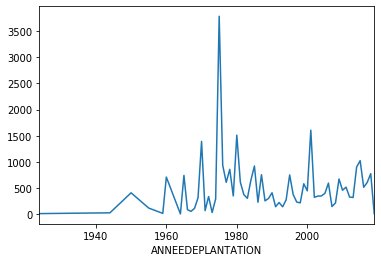

In [31]:
data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['ANNEEDEPLANTATION']).count()['GENRE_BOTA'].plot.line()

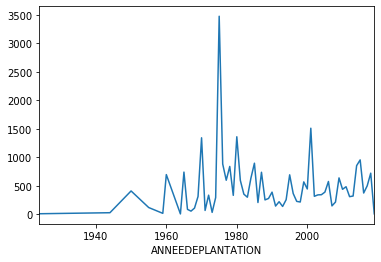

In [32]:
data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['ANNEEDEPLANTATION']).count()['ESPECE'].plot.line()

In [33]:
mask = data['GENRE_BOTA'] == "Platanus"
mask

0        False
1        False
2        False
3        False
4        False
         ...  
31887    False
31888    False
31889    False
31890    False
31891    False
Name: GENRE_BOTA, Length: 31892, dtype: bool

In [34]:
mask1 = ((data['GENRE_BOTA'] == 'Platanus') & (data['ESPECE'] == 'acerifolia'))

In [35]:
data[mask1]['ANNEEDEPLANTATION']

263      1975.0
271      1999.0
272      1999.0
273      1999.0
274      1999.0
          ...  
31802    1976.0
31803    1976.0
31804    1976.0
31805    1976.0
31806    1976.0
Name: ANNEEDEPLANTATION, Length: 4008, dtype: float64

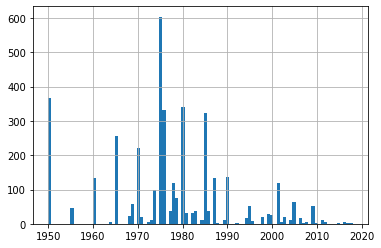

In [36]:
nbins = int(data['ANNEEDEPLANTATION'].max() - data['ANNEEDEPLANTATION'].min() + 1)
data[mask1]['ANNEEDEPLANTATION'].hist(bins=nbins)

In [37]:
data

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,16750,ESP19318,ESP19318,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7394161255246..."
1,20142,ESP18095,ESP18095,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7397428849165..."
2,23843,ESP17861,ESP17861,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7393229609447..."
3,23841,ESP17860,ESP17860,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7410808202830..."
4,1778,ESP16403,ESP16403,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7408124079286..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31887,16922,ESP19587,ESP19587,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7251768715205..."
31888,12659,ESP19291,ESP19291,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7260735681418..."
31889,1869,ESP16427,ESP16427,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7253254570262..."
31890,24296,ESP14848,ESP14848,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7262050374391..."


In [57]:
data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['GENRE_BOTA','ESPECE']).count()

ANNEEDEPLANTATION
GENRE_BOTA ESPECE                         
Abies      alba                          1
           concolor                      5
           koreana                       1
           nordmanniana                 17
           pinsapo                       2
...                                    ...
Ulmus      minor                       136
           parvifolia                    5
           resista                      24
Zelkova    crenata                       2
           serrata                     275

[339 rows x 1 columns]

In [75]:
data.loc[:,['GENRE_BOTA','ESPECE','ANNEEDEPLANTATION']].groupby(['ANNEEDEPLANTATION','GENRE_BOTA','ESPECE']).size()

ANNEEDEPLANTATION  GENRE_BOTA     ESPECE     
1924.0             Betula         verrucosa      1
                   Chamaecyparis  formosensis    1
                   Diospyros      lotus          1
                   Fagus          sylvatica      1
                   Ilex           aquifolium     1
                                                ..
2019.0             Euodia         daniellii      1
                   Koelreuteria   paniculata     1
                   Magnolia       kobus          1
                   Prunus         padus          1
                                  serrulata      1
Length: 2830, dtype: int64

In [67]:
data['GENRE_ESPECE'] = data['GENRE_BOTA'].astype(str) +" "+ data['ESPECE']
data.columns.tolist()

['ELEM_POINT_ID',
 'CODE',
 'NOM',
 'GENRE',
 'GENRE_DESC',
 'CATEGORIE',
 'CATEGORIE_DESC',
 'SOUS_CATEGORIE',
 'SOUS_CATEGORIE_DESC',
 'CODE_PARENT',
 'CODE_PARENT_DESC',
 'ADR_SECTEUR',
 'BIEN_REFERENCE',
 'GENRE_BOTA',
 'ESPECE',
 'VARIETE',
 'STADEDEDEVELOPPEMENT',
 'EQUIPE',
 'REMARQUES',
 'ANNEEDEPLANTATION',
 'RAISONDEPLANTATION',
 'TRAITEMENTCHENILLES',
 'COURRIER',
 'IDENTIFIANTPLU',
 'TYPEIMPLANTATIONPLU',
 'INTITULEPROTECTIONPLU',
 'ANNEEABATTAGE',
 'ESSOUCHEMENT',
 'DIAMETREARBRE',
 'CAUSEABATTAGE',
 'COLLECTIVITE',
 'GeoJSON',
 'GENRE_ESPECE',
 'COUNT']

In [82]:
data.loc[:,['GENRE_ESPECE','ANNEEDEPLANTATION']].groupby(['ANNEEDEPLANTATION','GENRE_ESPECE']).size()

ANNEEDEPLANTATION  GENRE_ESPECE             
1924.0             Betula verrucosa             1
                   Chamaecyparis formosensis    1
                   Diospyros lotus              1
                   Fagus sylvatica              1
                   Ilex aquifolium              1
                                               ..
2019.0             Euodia daniellii             1
                   Koelreuteria paniculata      1
                   Magnolia kobus               1
                   Prunus padus                 1
                   Prunus serrulata             1
Length: 2830, dtype: int64

In [101]:
data_short = data.loc[:,['GENRE_ESPECE','ANNEEDEPLANTATION']].groupby(['GENRE_ESPECE','ANNEEDEPLANTATION']).size()
data_short

GENRE_ESPECE     ANNEEDEPLANTATION
Abies alba       1980.0                1
Abies concolor   1969.0                1
                 1996.0                3
                 2004.0                1
Abies koreana    2016.0                1
                                      ..
Zelkova serrata  2014.0               22
                 2015.0               31
                 2016.0                6
                 2017.0               35
                 2018.0               25
Length: 2830, dtype: int64

In [102]:
ind=data.loc[:,['GENRE_ESPECE','ANNEEDEPLANTATION']].groupby(['GENRE_ESPECE','ANNEEDEPLANTATION']).size().idxmax()
data_short[ind]

604

In [103]:
proportion = 100 * data_short / data_short.groupby(level=0).sum()

In [104]:
proportion

GENRE_ESPECE     ANNEEDEPLANTATION
Abies alba       1980.0               100.000000
Abies concolor   1969.0                20.000000
                 1996.0                60.000000
                 2004.0                20.000000
Abies koreana    2016.0               100.000000
                                         ...    
Zelkova serrata  2014.0                 8.000000
                 2015.0                11.272727
                 2016.0                 2.181818
                 2017.0                12.727273
                 2018.0                 9.090909
Length: 2830, dtype: float64

In [107]:
data.columns.tolist()

['ELEM_POINT_ID',
 'CODE',
 'NOM',
 'GENRE',
 'GENRE_DESC',
 'CATEGORIE',
 'CATEGORIE_DESC',
 'SOUS_CATEGORIE',
 'SOUS_CATEGORIE_DESC',
 'CODE_PARENT',
 'CODE_PARENT_DESC',
 'ADR_SECTEUR',
 'BIEN_REFERENCE',
 'GENRE_BOTA',
 'ESPECE',
 'VARIETE',
 'STADEDEDEVELOPPEMENT',
 'EQUIPE',
 'REMARQUES',
 'ANNEEDEPLANTATION',
 'RAISONDEPLANTATION',
 'TRAITEMENTCHENILLES',
 'COURRIER',
 'IDENTIFIANTPLU',
 'TYPEIMPLANTATIONPLU',
 'INTITULEPROTECTIONPLU',
 'ANNEEABATTAGE',
 'ESSOUCHEMENT',
 'DIAMETREARBRE',
 'CAUSEABATTAGE',
 'COLLECTIVITE',
 'GeoJSON',
 'GENRE_ESPECE',
 'COUNT']

In [109]:
data.ANNEEABATTAGE.isna().count()

31892